# Validation: Does the pattern hold up when stratifying across different lighting conditions? Do we see very different lighting between west and east?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import cv2

In [2]:
color_df = pd.read_csv('../filtered_labeled_data.csv')

# Add darkness column and region

In [3]:
# in hsl, where "l" is lightness. 
# we can then subtract l from 1 for "intensity" = darkness
darkness = []
for hsl in color_df.hsl:
    # parse the text hsl value into a list of 3 str vals
    # (function generating this val is in notebook 5)
    h,s,l = hsl.strip('()').split(',')
    darkness.append(1-float(l))
color_df['darkness'] = darkness

In [4]:
# set region split longitude
focal_lon = -100 
# make a "region" column based on longitude
color_df['region'] = color_df['longitude'].apply(lambda x: 'East' if x > focal_lon else 'West')

# Robin's Validation

In [5]:
robin_val = pd.read_csv('./validation_subset_Robin.csv')
robin_val.columns = ['image_idxs', 'lighting', 'monarda']
robin_val.to_csv('./validation_subset_Robin.csv',index=False)

In [6]:
robin_val

,image_idxs,lighting,monarda
0,10,h,NaN
1,143,s,NaN
2,177,s,NaN
3,382,s,NaN
4,531,h,NaN
...,...,...,...
495,40750,s,NaN
496,40772,s,NaN
497,40822,s,NaN
498,40894,h,NaN


In [7]:
# how many of them 
robin_val.monarda.isna().sum()

np.int64(500)

In [8]:
sunlist = list(robin_val[robin_val.lighting.eq('s')].image_idxs)
shadelist = list(robin_val[robin_val.lighting.eq('h')].image_idxs)
partiallist = list(robin_val[robin_val.lighting.eq('p')].image_idxs)

In [9]:
sun_df = color_df[(color_df.image_idx.isin(sunlist))]
shade_df = color_df[(color_df.image_idx.isin(shadelist))]
partial_df = color_df[(color_df.image_idx.isin(partiallist))]

In [10]:
print(f"Number of overall sun observations: {len(sunlist)}")
print(f"    West: {np.sum(sun_df.longitude < -100)}")
print(f"    East: {np.sum(sun_df.longitude > -100)}")
print(f"Number of overall shade observations: {len(shadelist)}")
print(f"    West: {np.sum(shade_df.longitude < -100)}")
print(f"    East: {np.sum(shade_df.longitude > -100)}")
print(f"Number of overall partial observations: {len(partiallist)}")
print(f"    West: {np.sum(partial_df.longitude < -100)}")
print(f"    East: {np.sum(partial_df.longitude > -100)}")

Number of overall sun observations: 238
    West: 124
    East: 114
Number of overall shade observations: 184
    West: 86
    East: 98
Number of overall partial observations: 78
    West: 40
    East: 38


# Boxplots

## get median color for each region

In [11]:
# conversion functions (from notebook 5)
def rgb_to_hex(rgb):
    # rgb should be a tuple like (R, G, B)
    return '#{:02x}{:02x}{:02x}'.format(*rgb)
def lab_to_rgb(lab):
    """convert (L,a,b) in OpenCV's Lab to (r,g,b) in [0,255]"""
    arr = np.array([[lab]], dtype=np.uint8)
    rgb = cv2.cvtColor(arr, cv2.COLOR_LAB2RGB)[0][0]
    return tuple(int(x) for x in rgb)

In [12]:
#####
#SUN#
#####

### WEST
west_sun = list(sun_df[sun_df.region.eq('West')].lab)
west_sun = [i.strip('()').split(', ') for i in west_sun]
west_sun = [[float(q) for q in i] for i in west_sun]

median_lab = np.median(west_sun,axis=0) # lab color
sun_west_median_color = rgb_to_hex(lab_to_rgb(median_lab)) # hex color

### EAST
east_sun = list(sun_df[sun_df.region.eq('East')].lab)
east_sun = [i.strip('()').split(', ') for i in east_sun]
east_sun = [[float(q) for q in i] for i in east_sun]

median_lab = np.median(east_sun,axis=0) # lab color
sun_east_median_color = rgb_to_hex(lab_to_rgb(median_lab)) # hex color

#######
#SHADE#
#######

### WEST
west_shade = list(shade_df[shade_df.region.eq('West')].lab)
west_shade = [i.strip('()').split(', ') for i in west_shade]
west_shade = [[float(q) for q in i] for i in west_shade]

median_lab = np.median(west_shade,axis=0) # lab color
shade_west_median_color = rgb_to_hex(lab_to_rgb(median_lab)) # hex color

### EAST
east_shade = list(shade_df[shade_df.region.eq('East')].lab)
east_shade = [i.strip('()').split(', ') for i in east_shade]
east_shade = [[float(q) for q in i] for i in east_shade]

median_lab = np.median(east_shade,axis=0) # lab color
shade_east_median_color = rgb_to_hex(lab_to_rgb(median_lab)) # hex color


#########
#PARTIAL#
#########

### WEST
west_partial = list(partial_df[partial_df.region.eq('West')].lab)
west_partial = [i.strip('()').split(', ') for i in west_partial]
west_partial = [[float(q) for q in i] for i in west_partial]

median_lab = np.median(west_partial,axis=0) # lab color
partial_west_median_color = rgb_to_hex(lab_to_rgb(median_lab)) # hex color

### EAST
east_partial = list(partial_df[partial_df.region.eq('East')].lab)
east_partial = [i.strip('()').split(', ') for i in east_partial]
east_partial = [[float(q) for q in i] for i in east_partial]

median_lab = np.median(east_partial,axis=0) # lab color
partial_east_median_color = rgb_to_hex(lab_to_rgb(median_lab)) # hex color

## Sun individual boxplots

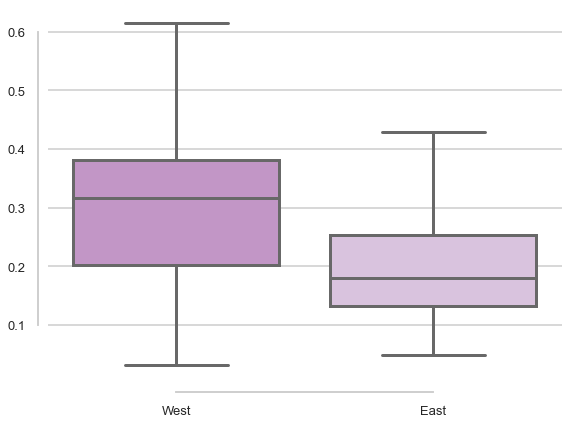

t-statistic: -8.132
p-value: 0.00000


In [13]:
# make nice figure aesthetics
sns.set(style='whitegrid', context='talk', font_scale=1.2)

# set up plot
fig, ax = plt.subplots(figsize=(8, 6))

# specify boxplot params
sns.boxplot(
    x='region',
    y='darkness',
    data=sun_df,
    hue='region',
    legend=False,
    palette=[sun_west_median_color, sun_east_median_color],  # two shades of purple. could be the same, no preference here.
    linewidth=3,
    fliersize=4,
    order=['West', 'East'],
    hue_order=['West', 'East'],
    ax=ax
)

# no labels/titles
#ax.set_title('"Darkness" by Region (West vs. East)', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel(None)
ax.set_ylabel(None)

# tick parameters
ax.tick_params(axis='both', which='major', labelsize=13)

# this helps push the horiz bars away from the y
sns.despine(offset=10, trim=True)

# let's see it!
plt.tight_layout()
plt.show()

# t-test as well
west_darkness = sun_df[sun_df['region'] == 'West']['darkness']
east_darkness = sun_df[sun_df['region'] == 'East']['darkness']
t_stat, p_value = ttest_ind(east_darkness, west_darkness, equal_var=False)

# t-test results
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.5f}")

## Shade individual boxplots

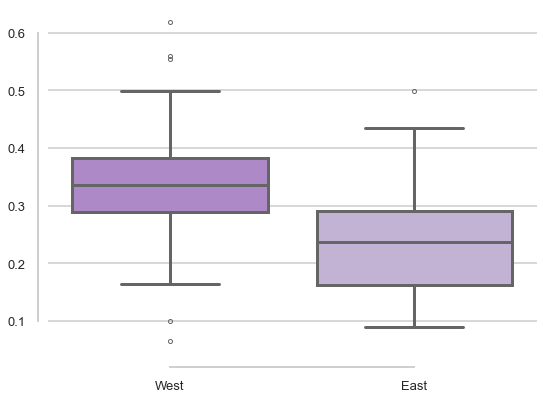

t-statistic: -7.314
p-value: 0.00000


In [14]:
# make nice figure aesthetics
sns.set(style='whitegrid', context='talk', font_scale=1.2)

# set up plot
fig, ax = plt.subplots(figsize=(8, 6))

# specify boxplot params
sns.boxplot(
    x='region',
    y='darkness',
    data=shade_df,
    hue='region',
    legend=False,
    palette=[shade_west_median_color, shade_east_median_color],  # two shades of purple. could be the same, no preference here.
    linewidth=3,
    fliersize=4,
    order=['West', 'East'],
    hue_order=['West', 'East'],
    ax=ax
)

# no labels/titles
#ax.set_title('"Darkness" by Region (West vs. East)', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel(None)
ax.set_ylabel(None)

# tick parameters
ax.tick_params(axis='both', which='major', labelsize=13)

# this helps push the horiz bars away from the y
sns.despine(offset=10, trim=True)

# let's see it!
plt.tight_layout()
plt.show()

# t-test as well
west_darkness = shade_df[shade_df['region'] == 'West']['darkness']
east_darkness = shade_df[shade_df['region'] == 'East']['darkness']
t_stat, p_value = ttest_ind(east_darkness, west_darkness, equal_var=False)

# t-test results
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.5f}")

## Partial individual boxplots

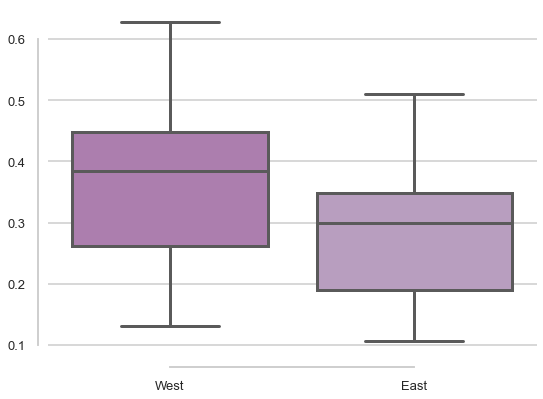

t-statistic: -2.924
p-value: 0.00457


In [15]:
# make nice figure aesthetics
sns.set(style='whitegrid', context='talk', font_scale=1.2)

# set up plot
fig, ax = plt.subplots(figsize=(8, 6))

# specify boxplot params
sns.boxplot(
    x='region',
    y='darkness',
    data=partial_df,
    hue='region',
    legend=False,
    palette=[partial_west_median_color, partial_east_median_color],  # two shades of purple. could be the same, no preference here.
    linewidth=3,
    fliersize=4,
    order=['West', 'East'],
    hue_order=['West', 'East'],
    ax=ax
)

# no labels/titles
#ax.set_title('"Darkness" by Region (West vs. East)', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel(None)
ax.set_ylabel(None)

# tick parameters
ax.tick_params(axis='both', which='major', labelsize=13)

# this helps push the horiz bars away from the y
sns.despine(offset=10, trim=True)

# let's see it!
plt.tight_layout()
plt.show()

# t-test as well
west_darkness = partial_df[partial_df['region'] == 'West']['darkness']
east_darkness = partial_df[partial_df['region'] == 'East']['darkness']
t_stat, p_value = ttest_ind(east_darkness, west_darkness, equal_var=False)

# t-test results
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.5f}")

## All three together:

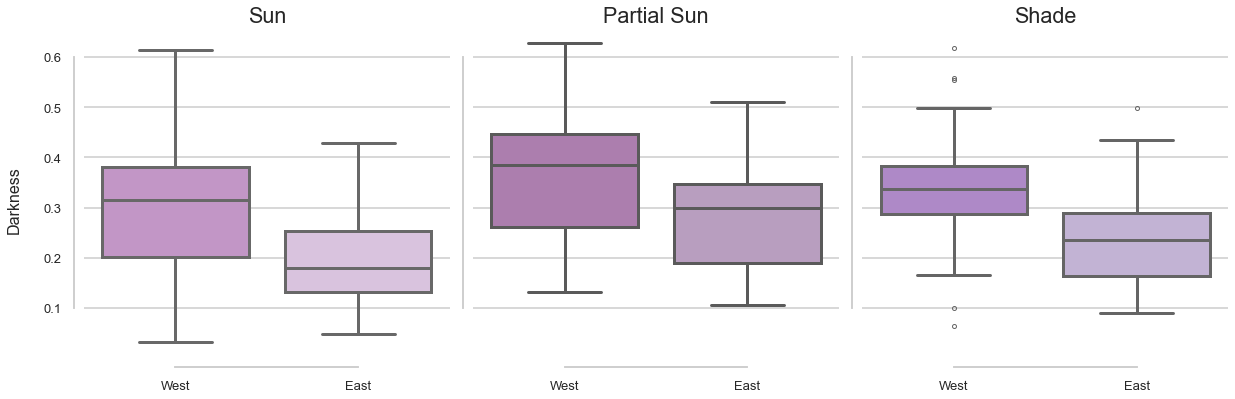

In [16]:
# make nice figure aesthetics
sns.set(style='whitegrid', context='talk', font_scale=1.2)

# 1 row, 3 columns, share y-axis
fig, axes = plt.subplots(ncols=3, sharey=True, figsize=(18, 6))

# PLOT 1: sun_df
sns.boxplot(
    x='region', y='darkness', data=sun_df,
    hue='region', legend=False,
    palette=[sun_west_median_color, sun_east_median_color],
    linewidth=3, fliersize=4,
    order=['West', 'East'], hue_order=['West', 'East'],
    ax=axes[0]
)
axes[0].set_title('Sun')
axes[0].set_xlabel(None)
axes[0].set_ylabel(None)
axes[0].tick_params(axis='both', which='major', labelsize=13)
sns.despine(ax=axes[0], offset=10, trim=True)

# PLOT 2: partial_df
sns.boxplot(
    x='region', y='darkness', data=partial_df,
    hue='region', legend=False,
    palette=[partial_west_median_color, partial_east_median_color],
    linewidth=3, fliersize=4,
    order=['West', 'East'], hue_order=['West', 'East'],
    ax=axes[1]
)
axes[1].set_title('Partial Sun')
axes[1].set_xlabel(None)
axes[1].set_ylabel(None)
axes[1].tick_params(axis='both', which='major', labelsize=13)
sns.despine(ax=axes[1], offset=10, trim=True)

# PLOT 3: shade_df
sns.boxplot(
    x='region', y='darkness', data=shade_df,
    hue='region', legend=False,
    palette=[shade_west_median_color, shade_east_median_color],
    linewidth=3, fliersize=4,
    order=['West', 'East'], hue_order=['West', 'East'],
    ax=axes[2]
)
axes[2].set_title('Shade')
axes[2].set_xlabel(None)
axes[2].set_ylabel(None)
axes[2].tick_params(axis='both', which='major', labelsize=13)
sns.despine(ax=axes[2], offset=10, trim=True)

# y label
fig.text(0.04, 0.5, 'Darkness', va='center', rotation='vertical', fontsize=16)

plt.tight_layout(rect=[0.05, 0, 1, 1])
plt.show()

# Sam's Validation

In [17]:
sam_val = pd.read_csv('./validation_subset_Sam.csv')
sam_val.columns = ['image_idxs', 'lighting', 'monarda']
sam_val.to_csv('./validation_subset_Sam.csv',index=False)

In [18]:
sam_val

,image_idxs,lighting,monarda
0,10,h,NaN
1,143,s,NaN
2,177,s,NaN
3,382,p,NaN
4,531,h,NaN
...,...,...,...
495,40750,h,NaN
496,40772,s,NaN
497,40822,s,NaN
498,40894,h,NaN


In [19]:
# how many of them 
sam_val.monarda.isna().sum()

np.int64(500)

In [20]:
# how many agree with Robin?
np.sum(np.array(robin_val.lighting) == np.array(sam_val.lighting))

np.int64(371)

In [21]:
sunlist = list(sam_val[sam_val.lighting.eq('s')].image_idxs)
shadelist = list(sam_val[sam_val.lighting.eq('h')].image_idxs)
partiallist = list(sam_val[sam_val.lighting.eq('p')].image_idxs)

In [22]:
np.sum(sam_val.lighting.eq('n'))

np.int64(1)

In [23]:
sun_df = color_df[(color_df.image_idx.isin(sunlist))]
shade_df = color_df[(color_df.image_idx.isin(shadelist))]
partial_df = color_df[(color_df.image_idx.isin(partiallist))]

In [24]:
print(f"Number of overall sun observations: {len(sunlist)}")
print(f"    West: {np.sum(sun_df.longitude < -100)}")
print(f"    East: {np.sum(sun_df.longitude > -100)}")
print(f"Number of overall shade observations: {len(shadelist)}")
print(f"    West: {np.sum(shade_df.longitude < -100)}")
print(f"    East: {np.sum(shade_df.longitude > -100)}")
print(f"Number of overall partial observations: {len(partiallist)}")
print(f"    West: {np.sum(partial_df.longitude < -100)}")
print(f"    East: {np.sum(partial_df.longitude > -100)}")

Number of overall sun observations: 234
    West: 113
    East: 121
Number of overall shade observations: 167
    West: 82
    East: 85
Number of overall partial observations: 98
    West: 54
    East: 44


In [25]:
54+44+82+85+113+121

499

# Boxplots

## get median color for each region

In [26]:
# conversion functions (from notebook 5)
def rgb_to_hex(rgb):
    # rgb should be a tuple like (R, G, B)
    return '#{:02x}{:02x}{:02x}'.format(*rgb)
def lab_to_rgb(lab):
    """convert (L,a,b) in OpenCV's Lab to (r,g,b) in [0,255]"""
    arr = np.array([[lab]], dtype=np.uint8)
    rgb = cv2.cvtColor(arr, cv2.COLOR_LAB2RGB)[0][0]
    return tuple(int(x) for x in rgb)

In [27]:
#####
#SUN#
#####

### WEST
west_sun = list(sun_df[sun_df.region.eq('West')].lab)
west_sun = [i.strip('()').split(', ') for i in west_sun]
west_sun = [[float(q) for q in i] for i in west_sun]

median_lab = np.median(west_sun,axis=0) # lab color
sun_west_median_color = rgb_to_hex(lab_to_rgb(median_lab)) # hex color

### EAST
east_sun = list(sun_df[sun_df.region.eq('East')].lab)
east_sun = [i.strip('()').split(', ') for i in east_sun]
east_sun = [[float(q) for q in i] for i in east_sun]

median_lab = np.median(east_sun,axis=0) # lab color
sun_east_median_color = rgb_to_hex(lab_to_rgb(median_lab)) # hex color

#######
#SHADE#
#######

### WEST
west_shade = list(shade_df[shade_df.region.eq('West')].lab)
west_shade = [i.strip('()').split(', ') for i in west_shade]
west_shade = [[float(q) for q in i] for i in west_shade]

median_lab = np.median(west_shade,axis=0) # lab color
shade_west_median_color = rgb_to_hex(lab_to_rgb(median_lab)) # hex color

### EAST
east_shade = list(shade_df[shade_df.region.eq('East')].lab)
east_shade = [i.strip('()').split(', ') for i in east_shade]
east_shade = [[float(q) for q in i] for i in east_shade]

median_lab = np.median(east_shade,axis=0) # lab color
shade_east_median_color = rgb_to_hex(lab_to_rgb(median_lab)) # hex color


#########
#PARTIAL#
#########

### WEST
west_partial = list(partial_df[partial_df.region.eq('West')].lab)
west_partial = [i.strip('()').split(', ') for i in west_partial]
west_partial = [[float(q) for q in i] for i in west_partial]

median_lab = np.median(west_partial,axis=0) # lab color
partial_west_median_color = rgb_to_hex(lab_to_rgb(median_lab)) # hex color

### EAST
east_partial = list(partial_df[partial_df.region.eq('East')].lab)
east_partial = [i.strip('()').split(', ') for i in east_partial]
east_partial = [[float(q) for q in i] for i in east_partial]

median_lab = np.median(east_partial,axis=0) # lab color
partial_east_median_color = rgb_to_hex(lab_to_rgb(median_lab)) # hex color

## Sun individual boxplots

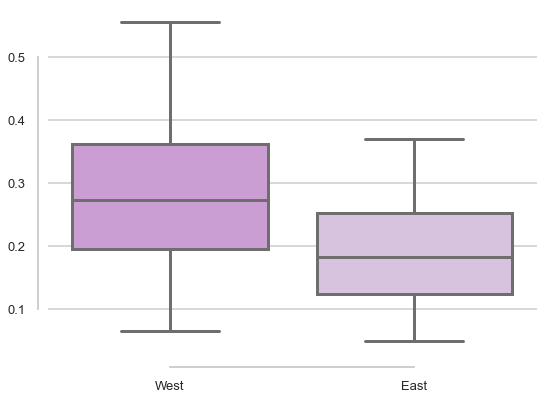

t-statistic: -7.551
p-value: 0.00000


In [28]:
# make nice figure aesthetics
sns.set(style='whitegrid', context='talk', font_scale=1.2)

# set up plot
fig, ax = plt.subplots(figsize=(8, 6))

# specify boxplot params
sns.boxplot(
    x='region',
    y='darkness',
    data=sun_df,
    hue='region',
    legend=False,
    palette=[sun_west_median_color, sun_east_median_color],  # two shades of purple. could be the same, no preference here.
    linewidth=3,
    fliersize=4,
    order=['West', 'East'],
    hue_order=['West', 'East'],
    ax=ax
)

# no labels/titles
#ax.set_title('"Darkness" by Region (West vs. East)', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel(None)
ax.set_ylabel(None)

# tick parameters
ax.tick_params(axis='both', which='major', labelsize=13)

# this helps push the horiz bars away from the y
sns.despine(offset=10, trim=True)

# let's see it!
plt.tight_layout()
plt.show()

# t-test as well
west_darkness = sun_df[sun_df['region'] == 'West']['darkness']
east_darkness = sun_df[sun_df['region'] == 'East']['darkness']
t_stat, p_value = ttest_ind(east_darkness, west_darkness, equal_var=False)

# t-test results
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.5f}")

## Shade individual boxplots

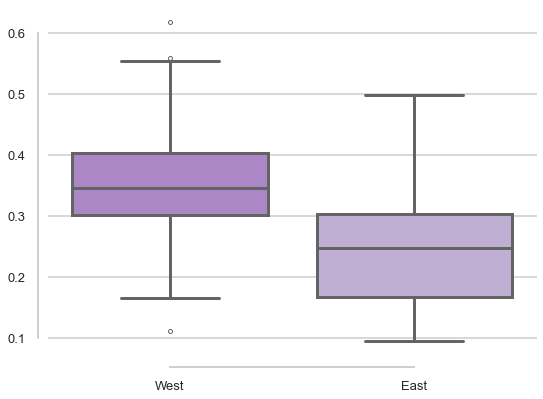

t-statistic: -7.621
p-value: 0.00000


In [29]:
# make nice figure aesthetics
sns.set(style='whitegrid', context='talk', font_scale=1.2)

# set up plot
fig, ax = plt.subplots(figsize=(8, 6))

# specify boxplot params
sns.boxplot(
    x='region',
    y='darkness',
    data=shade_df,
    hue='region',
    legend=False,
    palette=[shade_west_median_color, shade_east_median_color],  # two shades of purple. could be the same, no preference here.
    linewidth=3,
    fliersize=4,
    order=['West', 'East'],
    hue_order=['West', 'East'],
    ax=ax
)

# no labels/titles
#ax.set_title('"Darkness" by Region (West vs. East)', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel(None)
ax.set_ylabel(None)

# tick parameters
ax.tick_params(axis='both', which='major', labelsize=13)

# this helps push the horiz bars away from the y
sns.despine(offset=10, trim=True)

# let's see it!
plt.tight_layout()
plt.show()

# t-test as well
west_darkness = shade_df[shade_df['region'] == 'West']['darkness']
east_darkness = shade_df[shade_df['region'] == 'East']['darkness']
t_stat, p_value = ttest_ind(east_darkness, west_darkness, equal_var=False)

# t-test results
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.5f}")

## Partial individual boxplots

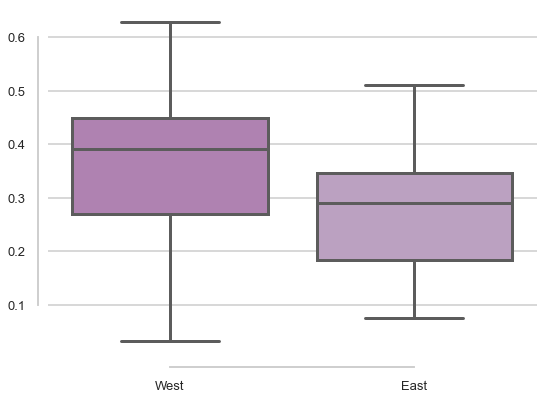

t-statistic: -3.725
p-value: 0.00033


In [30]:
# make nice figure aesthetics
sns.set(style='whitegrid', context='talk', font_scale=1.2)

# set up plot
fig, ax = plt.subplots(figsize=(8, 6))

# specify boxplot params
sns.boxplot(
    x='region',
    y='darkness',
    data=partial_df,
    hue='region',
    legend=False,
    palette=[partial_west_median_color, partial_east_median_color],  # two shades of purple. could be the same, no preference here.
    linewidth=3,
    fliersize=4,
    order=['West', 'East'],
    hue_order=['West', 'East'],
    ax=ax
)

# no labels/titles
#ax.set_title('"Darkness" by Region (West vs. East)', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel(None)
ax.set_ylabel(None)

# tick parameters
ax.tick_params(axis='both', which='major', labelsize=13)

# this helps push the horiz bars away from the y
sns.despine(offset=10, trim=True)

# let's see it!
plt.tight_layout()
plt.show()

# t-test as well
west_darkness = partial_df[partial_df['region'] == 'West']['darkness']
east_darkness = partial_df[partial_df['region'] == 'East']['darkness']
t_stat, p_value = ttest_ind(east_darkness, west_darkness, equal_var=False)

# t-test results
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.5f}")

## All three together:

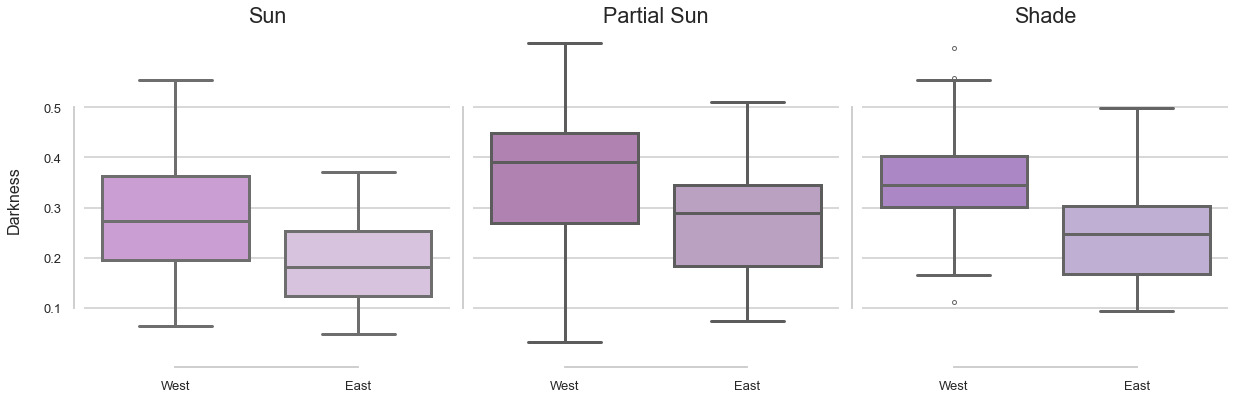

In [31]:
# make nice figure aesthetics
sns.set(style='whitegrid', context='talk', font_scale=1.2)

# 1 row, 3 columns, share y-axis
fig, axes = plt.subplots(ncols=3, sharey=True, figsize=(18, 6))

# PLOT 1: sun_df
sns.boxplot(
    x='region', y='darkness', data=sun_df,
    hue='region', legend=False,
    palette=[sun_west_median_color, sun_east_median_color],
    linewidth=3, fliersize=4,
    order=['West', 'East'], hue_order=['West', 'East'],
    ax=axes[0]
)
axes[0].set_title('Sun')
axes[0].set_xlabel(None)
axes[0].set_ylabel(None)
axes[0].tick_params(axis='both', which='major', labelsize=13)
sns.despine(ax=axes[0], offset=10, trim=True)

# PLOT 2: partial_df
sns.boxplot(
    x='region', y='darkness', data=partial_df,
    hue='region', legend=False,
    palette=[partial_west_median_color, partial_east_median_color],
    linewidth=3, fliersize=4,
    order=['West', 'East'], hue_order=['West', 'East'],
    ax=axes[1]
)
axes[1].set_title('Partial Sun')
axes[1].set_xlabel(None)
axes[1].set_ylabel(None)
axes[1].tick_params(axis='both', which='major', labelsize=13)
sns.despine(ax=axes[1], offset=10, trim=True)

# PLOT 3: shade_df
sns.boxplot(
    x='region', y='darkness', data=shade_df,
    hue='region', legend=False,
    palette=[shade_west_median_color, shade_east_median_color],
    linewidth=3, fliersize=4,
    order=['West', 'East'], hue_order=['West', 'East'],
    ax=axes[2]
)
axes[2].set_title('Shade')
axes[2].set_xlabel(None)
axes[2].set_ylabel(None)
axes[2].tick_params(axis='both', which='major', labelsize=13)
sns.despine(ax=axes[2], offset=10, trim=True)

# y label
fig.text(0.04, 0.5, 'Darkness', va='center', rotation='vertical', fontsize=16)

plt.tight_layout(rect=[0.05, 0, 1, 1])
plt.show()